<a href="https://www.kaggle.com/code/brianvilnrotter/anxiety-attack-factors-symptoms-and-severity?scriptVersionId=219550525" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anxiety-attack-factors-symptoms-and-severity/anxiety_attack_dataset.csv


### Intentions for this dataset
My intention for this data set is multi-fold.
* Firstly, I would like to analyze the data and see if there is a predictive label that can be gleamed from the data
* Second, my goal will be to build a predictive model using the data as a training source if a label is found
* Third, once I am happy with the predictive model I will try and sync the predictive model to my hugging face repo

# Table of Contents

* [0. Data Collection & Initial Analysis](#chapter0)

## 0. Data Collection & Initial Analysis <a class="anchor" id="chapter0"></a>

In [2]:
import seaborn as sns

np.random.seed(42)

In [3]:
df = pd.read_csv('/kaggle/input/anxiety-attack-factors-symptoms-and-severity/anxiety_attack_dataset.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,12000.0,6000.500000,3464.245950,1.0,3000.75,6000.5,9000.250,12000.0
Age,12000.0,40.966750,13.473280,18.0,29.00,41.0,53.000,64.0
Sleep Hours,12000.0,6.482650,2.014885,3.0,4.80,6.5,8.200,10.0
Physical Activity (hrs/week),12000.0,5.030892,2.889000,0.0,2.50,5.0,7.525,10.0
Caffeine Intake (mg/day),12000.0,246.696083,144.487071,0.0,122.00,244.0,371.000,499.0
Alcohol Consumption (drinks/week),12000.0,9.492833,5.769364,0.0,5.00,9.0,15.000,19.0
Stress Level (1-10),12000.0,5.462250,2.897201,1.0,3.00,5.0,8.000,10.0
Heart Rate (bpm during attack),12000.0,119.398500,34.806711,60.0,89.00,119.0,149.000,179.0
Breathing Rate (breaths/min),12000.0,25.462333,8.090686,12.0,18.00,25.0,32.000,39.0
Sweating Level (1-5),12000.0,2.987417,1.414482,1.0,2.00,3.0,4.000,5.0


In [4]:
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [5]:
df['Occupation'].unique()

array(['Other', 'Teacher', 'Doctor', 'Student', 'Unemployed', 'Engineer'],
      dtype=object)

In [6]:
def get_relevant_features(df,label):
    df_label = df[label]
    df_drop = df.drop(label,axis=1)
    df_dummy = pd.get_dummies(df_drop,columns=df_drop.columns,drop_first=True)
    return df_dummy[df_label>0.05]

<Axes: >

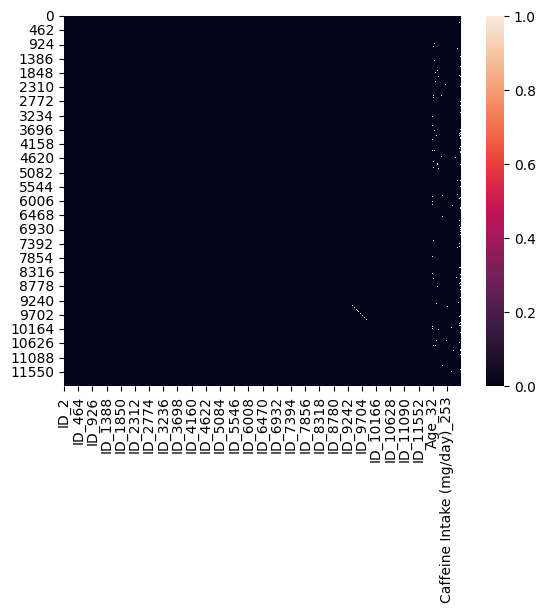

In [7]:
sns.heatmap(get_relevant_features(df,'Stress Level (1-10)'))

In [8]:
get_relevant_features(df,'Severity of Anxiety Attack (1-10)')

,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,...,Recent Major Life Event_Yes,Diet Quality (1-10)_2,Diet Quality (1-10)_3,Diet Quality (1-10)_4,Diet Quality (1-10)_5,Diet Quality (1-10)_6,Diet Quality (1-10)_7,Diet Quality (1-10)_8,Diet Quality (1-10)_9,Diet Quality (1-10)_10
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
11996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
11997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [9]:
get_relevant_features(df,'Diet Quality (1-10)')

,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,...,Recent Major Life Event_Yes,Severity of Anxiety Attack (1-10)_2,Severity of Anxiety Attack (1-10)_3,Severity of Anxiety Attack (1-10)_4,Severity of Anxiety Attack (1-10)_5,Severity of Anxiety Attack (1-10)_6,Severity of Anxiety Attack (1-10)_7,Severity of Anxiety Attack (1-10)_8,Severity of Anxiety Attack (1-10)_9,Severity of Anxiety Attack (1-10)_10
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [10]:
get_relevant_features(df,'Sweating Level (1-5)')

,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,...,Diet Quality (1-10)_10,Severity of Anxiety Attack (1-10)_2,Severity of Anxiety Attack (1-10)_3,Severity of Anxiety Attack (1-10)_4,Severity of Anxiety Attack (1-10)_5,Severity of Anxiety Attack (1-10)_6,Severity of Anxiety Attack (1-10)_7,Severity of Anxiety Attack (1-10)_8,Severity of Anxiety Attack (1-10)_9,Severity of Anxiety Attack (1-10)_10
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [11]:
df_correlation = df.copy()
df_correlation

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [12]:
def encode_categorical_features(df):
    return pd.get_dummies(df,columns=df.columns,drop_first=True)